The basic object of forecasting is the time series, which is a set of observations recorded over time. In forecasting applications, the observations are typically recorded with a regular frequency, like daily or monthly.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb


Which store is selling more products?

         date     type    locale locale_name                    description  \
0  2012-03-02  Holiday     Local       Manta             Fundacion de Manta   
1  2012-04-01  Holiday  Regional    Cotopaxi  Provincializacion de Cotopaxi   
2  2012-04-12  Holiday     Local      Cuenca            Fundacion de Cuenca   
3  2012-04-14  Holiday     Local    Libertad      Cantonizacion de Libertad   
4  2012-04-21  Holiday     Local    Riobamba      Cantonizacion de Riobamba   

   transferred  
0        False  
1        False  
2        False  
3        False  
4        False  
date           object
type           object
locale         object
locale_name    object
description    object
transferred      bool
dtype: object
date           datetime64[ns]
type                   object
locale                 object
locale_name            object
description            object
transferred              bool
dtype: object


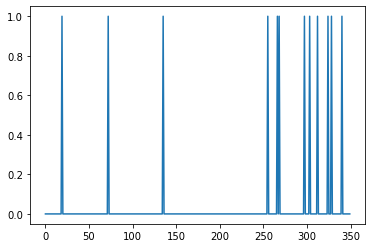

In [7]:
holiday = pd.read_csv ('holidays_events.csv')
print(holiday.head())
print(holiday.dtypes)
holiday['date']=pd.to_datetime(holiday['date'])
print(holiday.dtypes)
holiday.set_index(holiday['date'])
plt.plot(holiday['transferred'])

In [8]:
holiday.nunique()

date           312
type             6
locale           3
locale_name     24
description    103
transferred      2
dtype: int64

In [9]:
oil = pd.read_csv ('oil.csv',parse_dates=['date'])
oil.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [10]:
oil.nunique()

date          1218
dcoilwtico     998
dtype: int64

In [11]:
stores = pd.read_csv ('stores.csv')
stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [12]:
stores.nunique()

store_nbr    54
city         22
state        16
type          5
cluster      17
dtype: int64

In [13]:
transactions = pd.read_csv ('transactions.csv',parse_dates=['date'])
transactions.head()
# transactions.dtypes

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [14]:
transactions.nunique()

date            1682
store_nbr         54
transactions    4993
dtype: int64

In [34]:
train_data = pd.read_csv('train.csv',parse_dates=['date'])
test_data = pd.read_csv('test.csv',parse_dates=['date'])

print(train_data.head())
print(test_data.head())

   id       date  store_nbr      family  sales  onpromotion
0   0 2013-01-01          1  AUTOMOTIVE    0.0            0
1   1 2013-01-01          1   BABY CARE    0.0            0
2   2 2013-01-01          1      BEAUTY    0.0            0
3   3 2013-01-01          1   BEVERAGES    0.0            0
4   4 2013-01-01          1       BOOKS    0.0            0
        id       date  store_nbr      family  onpromotion
0  3000888 2017-08-16          1  AUTOMOTIVE            0
1  3000889 2017-08-16          1   BABY CARE            0
2  3000890 2017-08-16          1      BEAUTY            2
3  3000891 2017-08-16          1   BEVERAGES           20
4  3000892 2017-08-16          1       BOOKS            0


store_nbr : identifies the store at which the products are sold.

family : identifies the type of product sold.

sales :  gives the total sales for a product family at a particular store at a given date. 
Fractional values are possible since products can be sold in fractional units (1.5 kg of cheese, for instance, as opposed to 1 bag of chips).

onpromotion :  gives the total number of items in a product family that were being promoted at a store at a given date.

In [16]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           int64         
 1   date         datetime64[ns]
 2   store_nbr    int64         
 3   family       object        
 4   sales        float64       
 5   onpromotion  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 137.4+ MB


In [17]:
sample = pd.read_csv("sample_submission.csv")
sample.head()

,id,sales
0,3000888,0.0
1,3000889,0.0
2,3000890,0.0
3,3000891,0.0
4,3000892,0.0


In [20]:
print("Number of different product families: ",train_data['family'].nunique())

Number of different product families:  33


In [21]:
print("Number of different Stores: ",train_data['store_nbr'].nunique())

Number of different Stores:  54


In [35]:

train_data=train_data.set_index('date')
train_data=train_data.drop('id',axis=1)
train_data
# train_data[['store_nbr','family']].astype('category')

,store_nbr,family,sales,onpromotion
date,,,,
2013-01-01,1,AUTOMOTIVE,0.000,0
2013-01-01,1,BABY CARE,0.000,0
2013-01-01,1,BEAUTY,0.000,0
2013-01-01,1,BEVERAGES,0.000,0
2013-01-01,1,BOOKS,0.000,0
...,...,...,...,...
2017-08-15,9,POULTRY,438.133,0
2017-08-15,9,PREPARED FOODS,154.553,1
2017-08-15,9,PRODUCE,2419.729,148


In [37]:
train_data.isna().sum()
# No null values in train data

store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64